# Algo trading 1:
by Kefei Liu

Goal: choose 5 of the 24 dataseries of daily returns of unknown strategies.

Compute for each the set of “performance” statistics that you find the most informative

Based on these statistics rank the strategies from the best of the five strategies to the worse. Justify your ranking 

Note that you may want to explore the full set of the 24 series and pick the 5 most “contrasted” so your ranking can be made easier.


# 1. Getting Data

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
path = "Assignment#1_Performance_track_records.csv"
data = pd.read_csv(path)
data.head()

,Asset,DateTime,Price_Close,03_01,03_02,03_03,03_04,03_05,03_06,03_07,...,01_03,01_04,01_05,01_06,01_07,01_08,01_09,01_10,01_11,01_12
0,XAU/USD,1/1/2014 17:00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
1,XAU/USD,1/2/2014 17:00,1224.71,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
2,XAU/USD,1/3/2014 17:00,1237.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
3,XAU/USD,1/6/2014 17:00,1238.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.000899,0.000000,0.0,0.0
4,XAU/USD,1/7/2014 17:00,1232.46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.005002,-0.006569,0.0,0.0


In [3]:
data.describe()

,Price_Close,03_01,03_02,03_03,03_04,03_05,03_06,03_07,03_08,03_09,...,01_03,01_04,01_05,01_06,01_07,01_08,01_09,01_10,01_11,01_12
count,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,...,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000
mean,1222.824662,0.000204,0.000163,0.000196,0.000227,0.000191,0.000213,0.000121,0.000140,0.000133,...,0.000184,0.000198,0.000165,0.000227,0.000159,0.000156,0.000148,0.000165,0.000176,0.000238
std,88.533641,0.003471,0.003500,0.003722,0.003501,0.003424,0.003392,0.003403,0.003356,0.003304,...,0.004025,0.003870,0.003959,0.003833,0.003940,0.003920,0.003536,0.003848,0.003858,0.003716
min,0.000000,-0.018595,-0.019087,-0.031994,-0.018089,-0.010474,-0.010500,-0.018775,-0.010306,-0.013769,...,-0.032028,-0.018482,-0.018862,-0.018176,-0.018720,-0.018886,-0.011742,-0.034551,-0.019530,-0.018253
25%,1172.765000,-0.001395,-0.001542,-0.001560,-0.001505,-0.001403,-0.001359,-0.001363,-0.001345,-0.001775,...,-0.001965,-0.001896,-0.001955,-0.001819,-0.002018,-0.002020,-0.001955,-0.001934,-0.002082,-0.001799
50%,1227.780000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000072,0.000067,0.000032,0.000014,0.000000,0.000000,0.000000,0.000073,0.000000,0.000037
75%,1288.785000,0.001849,0.001791,0.001883,0.001837,0.001725,0.001727,0.001547,0.001534,0.001865,...,0.002295,0.002165,0.002266,0.002255,0.002265,0.002218,0.002197,0.002213,0.002197,0.002180
max,1383.030000,0.018107,0.018237,0.017624,0.017699,0.018051,0.017594,0.018073,0.018136,0.014706,...,0.018059,0.018320,0.018655,0.017944,0.018555,0.018587,0.014453,0.014628,0.018361,0.018151


In [4]:
strategies = data.columns[3:]

In [5]:
def _hist(data,strategies):
    fig = plt.figure(figsize=(15, 20))
    fig.suptitle("Histgram for each strategie" , verticalalignment = 'baseline')
    for i in np.arange(1,25):
        ax = fig.add_subplot(6,4,i)
        ax.hist(data[strategies[i-1]],bins=10)

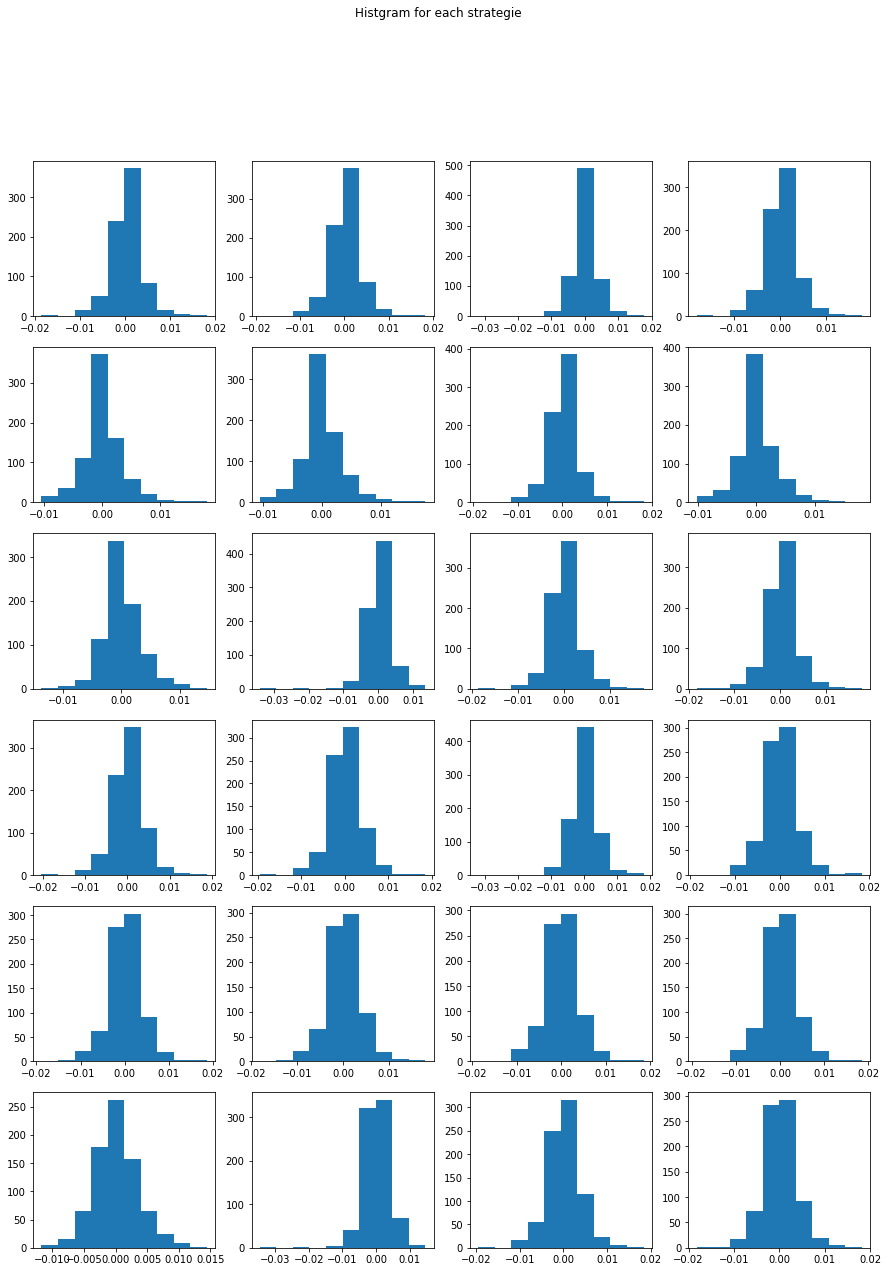

In [6]:
_hist(data,strategies)   

# 2. Cummulative Return
"Calculate cummulative returns and plot them according to the given column names"

In [7]:
def cummulative_return(daily_return_data,name):
    cr=[]
    for i,item in enumerate(name):
        temp=[]
        for j,item_ in enumerate(daily_return_data[item]):
            if j==0:
                temp.append(item_)
                continue
            else:
                temp.append((1+temp[j-1])*(1+item_)-1)
        cr.append(temp)
    return np.array(cr).T


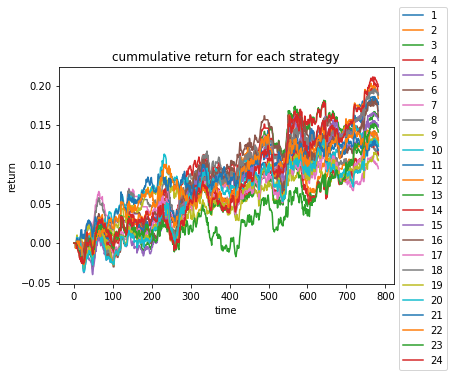

In [8]:
cum_return_=cummulative_return(data,strategies)
plt.title("cummulative return for each strategy")
plt.plot(cum_return_)
plt.legend(np.arange(1,25),bbox_to_anchor=(1.0, 1.3))#bbox_to_anchor controls position of legend.The first number controls moving to left and right.

plt.ylabel("return")
plt.xlabel("time")
plt.show()

# 3. Yearly Return and Annualized Return

In [9]:
def yearly_return(data,strategies_names,dates):
    yearly_return_out = []
    year = "0000"
    return_out = cummulative_return(data,strategies_names)

    # calculating annual return(anul_return_out) based on cummulative return(return_out)
    for i, item in enumerate(dates):
        if year == "0000":
            year = item[-9:-6]
            temp_last_year_return = np.zeros(len(strategies_names))
            
        if item[-9:-6] != year:
            year = item[-9:-6]
            yearly_return_out.append((return_out[i-1]+1)/(1+temp_last_year_return))
            temp_last_year_return = return_out[i-1]
    
    yearly_return_out.append((return_out[-1]+1)/(1+temp_last_year_return))
    yearly_return_out = np.array(yearly_return_out).T
    
    fig = plt.figure()
    plt.plot(["2014","2015","2016"],yearly_return_out.T,'*')
    plt.legend(np.arange(1,25),bbox_to_anchor=(1.1, 1.05))
    plt.show
    return yearly_return_out

In [10]:
dates = data["DateTime"]

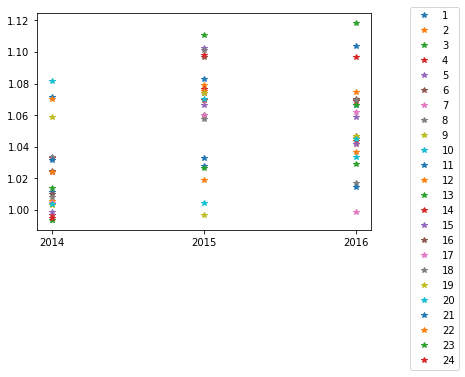

In [11]:
yearly_perf=np.average(yearly_return(data,strategies,dates ), axis=1)

In [12]:
def annualized_return(cu_return):
    m,n=cu_return.shape
    return cu_return[-1]*252/m  # cummulative return to annualized return

In [13]:
ar=annualized_return(cummulative_return(data,strategies))

# 4. Annualized Vol and Information Ratio

In [14]:
def annualized_vol(cu_return):
    m,n = cu_return.shape
    variance = np.var(cu_return,axis =0)
    annualized_vol = []
    for i,item in enumerate (variance):
        annualized_vol.append( math.sqrt(item/m*252))# Annualized vol=daily vol*sqrt(252)
    
    return np.array(annualized_vol)   

In [15]:
av=annualized_vol(cummulative_return(data,strategies))

In [16]:
information_ratio = np.round(ar/av,4)
information_ratio

array([1.75  , 1.6737, 1.3858, 1.7795, 1.9097, 1.792 , 1.7373, 1.8958,
       2.0711, 1.8761, 2.0074, 1.8865, 1.8347, 1.7328, 1.3534, 1.6456,
       1.8344, 1.7372, 1.6785, 1.5804, 1.8704, 1.7253, 2.0253, 1.8809])

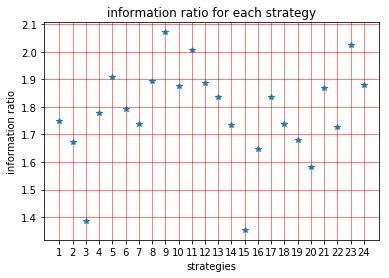

In [22]:
fig = plt.figure()
plt.plot(np.arange(1,25,1),information_ratio,"*")
plt.title("information ratio for each strategy")
plt.grid(color='r',  linewidth=0.5)
plt.xticks(np.arange(1,25,1))
plt.ylabel("information ratio")
plt.xlabel("strategies")
_ = plt.show()

We can see that top 5 information ratio strategies are 9,23,11,5,8.

In [18]:
info_return_vol = pd.DataFrame({"information ratio":information_ratio,"Annualized return":ar,"Annualized volatility":av})
info_return_vol.set_index(np.arange(1,25))

,information ratio,Annualized return,Annualized volatility
1,1.7500,0.054024,0.030871
2,1.6737,0.042043,0.025120
3,1.3858,0.051283,0.037005
4,1.7795,0.060884,0.034214
5,1.9097,0.050138,0.026254
6,1.7920,0.056657,0.031617
7,1.7373,0.030425,0.017513
8,1.8958,0.035735,0.018850
9,2.0711,0.033764,0.016303
10,1.8761,0.039501,0.021055


# 5. Computing top 5 largest drawdown

In [19]:
def largest_five_drawdown(data_column,one_strategy,strategy_number):
    global cum_return_
    cum_return = np.array(cum_return_).T[strategy_number-1]
    
    #Calculating top 5 drawdown based on cummulative return 
    DD = [0,0,0,0,0]
    DD_start_date = [0,0,0,0,0]
    DD_end_date = [0,0,0,0,0]

    #Calculate the largest DD
    i=np.argmax(np.maximum.accumulate(cum_return) -cum_return ) # end of the period
    j=np.argmax(cum_return[:i]) # start of period
    DD_end_date[0]=i
    DD_start_date[0]=j
    DD[0]=np.max(np.maximum.accumulate(cum_return) -cum_return )#largest drawdown
    
    #calculate other 4 DD without overlapping with each other
    for k in np.arange(1,5):
        b={}
        for i in range(0,len(DD_start_date),1):
            b[DD_start_date[i]]=DD_end_date[i]#library to match start date and end date
        order=np.sort(np.array(DD_start_date))
        DD_end_date_k=0
        DD_start_date_k=0
        max_return=0
        
        # point: drop drawdown interval from start date to end date we got, find other drawdowns
        for j,item in enumerate(order):     
            if item==0:
                continue
            if j==0:
                last_end_date=0
                next_start_date=order[j+1]
            elif j==len(order)-1:
                last_end_date=b[order[j-1]]
                next_start_date=len(cum_return)-1
            else :
                last_end_date=b[order[j-1]]
                next_start_date=order[j+1]
                
            max_return_1=np.max((np.maximum.accumulate(cum_return[last_end_date+1:item]) -cum_return[last_end_date+1:item]))
            max_return_2=np.max((np.maximum.accumulate(cum_return[b[item]+1:next_start_date]) -cum_return[ b[item]+1:next_start_date]))
            
            if max_return_1>max_return_2:
                DD_end_date_1=1+last_end_date+np.argmax(np.maximum.accumulate(cum_return[last_end_date+1:item]) 
                              -cum_return[last_end_date+1:item])
                DD_start_date_2=1+last_end_date+np.argmax(cum_return[last_end_date+1:DD_end_date_1])
                
                if max_return_1>max_return:
                    DD_end_date_k=DD_end_date_1
                    DD_start_date_k=DD_start_date_2
                max_return=max_return_1     
            else:
                DD_end_date_1=b[item]+1+np.argmax(np.maximum.accumulate(cum_return[b[item]+1:next_start_date]) 
                                -cum_return[ b[item]+1:next_start_date])
                DD_start_date_2=b[item]+1+np.argmax(cum_return[b[item]+1:DD_end_date_1])
               
                if max_return_2>max_return:
                    DD_end_date_k=DD_end_date_1
                    DD_start_date_k=DD_start_date_2
                max_return=max_return_2
        
        DD[k]= max_return
        DD_end_date[k]=DD_end_date_k
        DD_start_date[k]=DD_start_date_k
    
    #transform array to list and make a dataframe of drawdown and their dates
    DD_days  = (np.array(DD_end_date) - np.array(DD_start_date)).tolist()
    for i,item in enumerate(DD_start_date):
        DD_start_date[i] = dates[item][:-6]
    for i,item in enumerate(DD_end_date):
        DD_end_date[i] = dates[item][:-6]
        
    out = pd.DataFrame({"DrawDown":DD,"Start Date":DD_start_date,"End Date":DD_end_date,"Period long":DD_days})
    out.set_index(np.arange(1,6))
   
    return out
        
        

We get top 5 drawdowns of the 5 strategies we picked according to information ratio and show them in a table 

In [20]:
for i,item in enumerate([ 9,23,11,5,8]): 
    print("Drawdowns for Strategy {t}".format(t = item+1))
    print(largest_five_drawdown(data[strategies[item]],strategies[item],item+1))
    print("information ratio:",information_ratio[item])
    print("a good ratio:",np.round(yearly_perf[item]/np.array(largest_five_drawdown(data[strategies[item]],strategies[item],item+1))[0][0],4))
    print("")

Drawdowns for Strategy 10
   DrawDown  Start Date    End Date  Period long
0  0.053611  11/23/2015    1/4/2016           30
1  0.049382  11/21/2014   1/15/2015           39
2  0.041561   2/18/2016   6/29/2016           94
3  0.040790   10/5/2016   11/9/2016           25
4  0.010126  11/14/2016  12/28/2016           32
information ratio: 1.8761
a good ratio: 19.3958

Drawdowns for Strategy 24
   DrawDown  Start Date    End Date  Period long
0  0.059090  11/18/2014  12/29/2014           29
1  0.051209   2/16/2016   4/27/2016           51
2  0.040480    4/9/2015   7/13/2015           67
3  0.039854   12/1/2015    1/4/2016           24
4  0.028307   6/23/2016   8/12/2016           36
information ratio: 1.8809
a good ratio: 17.9962

Drawdowns for Strategy 12
   DrawDown Start Date    End Date  Period long
0  0.064066  2/16/2016   4/27/2016           51
1  0.048501  11/7/2014  12/29/2014           36
2  0.046165  12/1/2015   1/22/2016           38
3  0.024660  4/14/2014   5/23/2014          



We can see that strategy 10 and 6 have relatively large value of information ratio and a good ratio. The largest drawdown is around 0.055 and the largest drawdown period is relatively short. So we rank 10,6 as first and second strategy.

Then we can also see that information ratio values of 24 and 12 are close. A good ratio of 24 is better and the largest drawdown of 24 is smaller than that of 12, so we rank 24,12 after 6.

Strategy 9 has largest information ratio but has biggest largest drawdown and a long drawdown period, we can rank it last.

Finally we get top 5 strategies:10,6,24,12,9.

# Summary

 The goal of the project is choosing 5 of the 24 dataseries of daily returns of unknown strategies.
 Except for information ratio, we also have to see drawdown to rank strategies.What's more, in the program, a good ratio is set as yearly performance/ divided by largest DD as an informative statistics. When strategies have same information ratio, if the good ratio is bigger, the strategy is better.


First of all, we calculate cummulative return of each strategy and we can see as time increasing, cummulative return is on an uptrend. Then we calculate yearly return of each strategy for 2014,2015 and 2016.

Secondly, we calculate annualized return and annualized volatility based on cummulative return to get information ratio. Pick top 5 information ratio strategies and try to rank them based on top 5 drawdown and a good ratio in the next step.

Assume that 5 drawdowns for each strategy are not overlapping with each other. It's easy for us to calculate the largest drawdown by using np.argmax(np.maximum.accumulate) and find out the start date and end date. Then we drop the largest drawdown interval, find next 4 drawdowns. Every time we find a drawdown,we mark the start date and end date of it and drop the interval. So in the end, we get top 5 largest drawdowns without overlapping.

We get top 5 drawdowns of the 5 strategies we picked according to information ratio and show them in a table above.



We can see that strategy 10 and 6 have relatively large value of information ratio and a good ratio. The largest drawdown is around 0.055 and the largest drawdown period is relatively short. So we rank 10,6 as first and second strategy.

Then we can also see that information ratio values of 24 and 12 are close. A good ratio of 24 is better and the largest drawdown of 24 is smaller than that of 12, so we rank 24,12 after 6.

Strategy 9 has largest information ratio but has biggest largest drawdown and a long drawdown period, we can rank it last.

Finally we get top 5 strategies:10,6,24,12,9.